In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\GUOKECHENG\AppData\Local\Temp\ipykernel_45616\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 1.Analysis of Enquiries

d:\Sta-Software\python\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Sta-Software\python\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


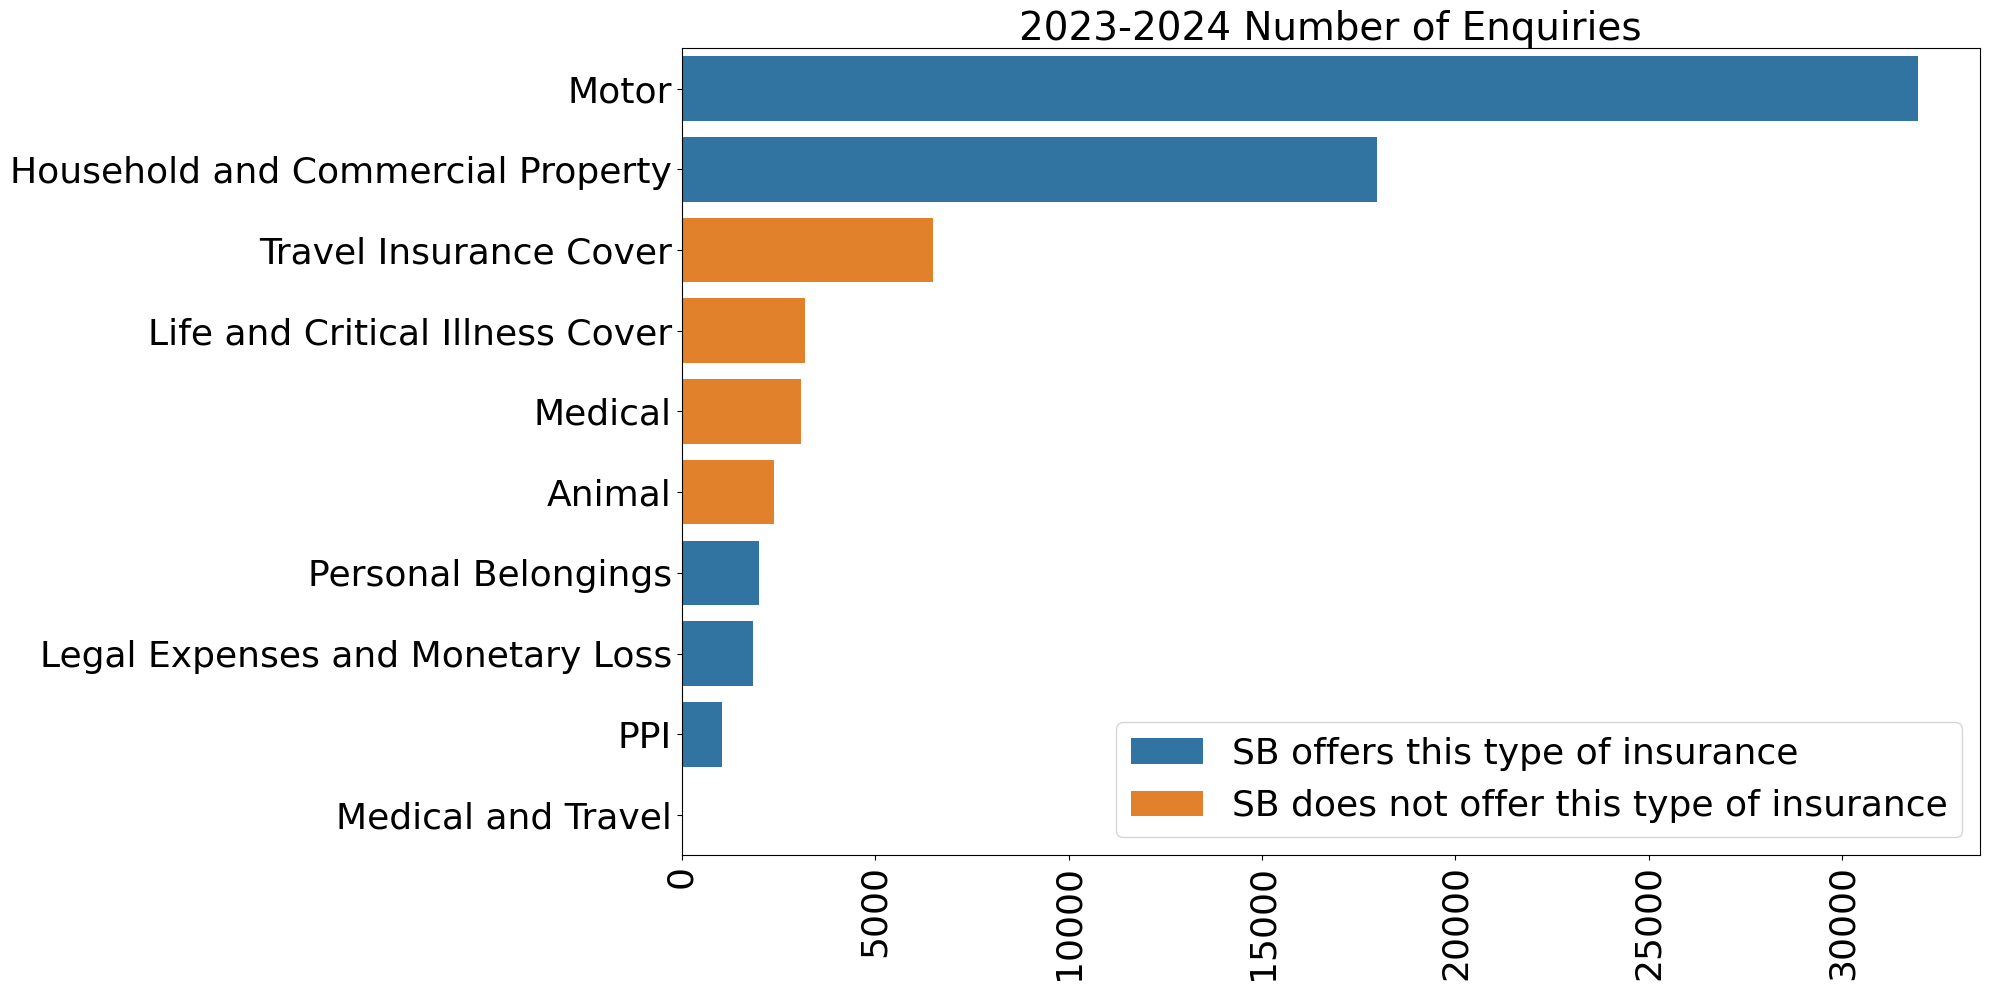

In [2]:
FOS_df = pd.read_csv('enquiry_2023_2024.csv')
FOS_df['inout'] = FOS_df['inout'].replace({1:'SB offers this type of insurance',0:'SB does not offer this type of insurance'})
FOS_df = FOS_df[['Product group','Enquiries','inout']]

plt.figure(figsize=(20,10))
sns.barplot(data=FOS_df.sort_values(by='Enquiries',ascending=0),
            y='Product group',
            x='Enquiries',
            hue='inout')
plt.xticks(rotation=90)
plt.legend(fontsize=26)
plt.title('2023-2024 Number of Enquiries',fontsize=28)
plt.ylabel('',fontsize=22)
plt.xlabel('',fontsize=22)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.tight_layout()
plt.show()


## 2.Complaint-Prone Insurance Products

In [3]:
df = pd.read_csv('data_all.csv')
df.drop(['Unnamed: 0','location','title','company','extras','tag','decision_id'],axis=1,inplace=True)
df = df[df['type of insurance'].isin([
    'Animal', 
    'Legal Expenses and Monetary Loss', 
    'Health', 
    'Household and Commercial Property', 
    'Travel', 
    'Motor', 
    'Personal Belongings', 
    'Payment Protection', 
    'Others'
])]
df = df[df['premium/payment'].isin(['Yes','No'])]
df = df[df['service attitude/communication'].isin(['Yes','No'])]
df = df[df["fail to meet customer's expectations"].isin(['Yes','No'])]
df = df[df['claims processing delays'].isin(['Yes','No'])]
df = df[df['policy terms'].isin(['Yes','No'])]
df = df[df['gender'].isin(['Male','Female','Male and Female'])]
df = df[~df.apply(lambda row: row.astype(str).str.contains('not specified', case=False).any(), axis=1)]
df.replace('Yes',1,inplace=True)
df.replace('No',0,inplace=True)
df.replace('Upheld',1,inplace=True)
df.replace('Not upheld',0,inplace=True)
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.to_period('M')

C:\Users\GUOKECHENG\AppData\Local\Temp\ipykernel_27592\1077943048.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('No',0,inplace=True)
C:\Users\GUOKECHENG\AppData\Local\Temp\ipykernel_27592\1077943048.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('Not upheld',0,inplace=True)
C:\Users\GUOKECHENG\AppData\Local\Temp\ipykernel_27592\1077943048.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expe

### Motor Insurance and Household and Commercial Property Insurance (offered by SB company)

In [4]:
motor_df = df[df['type of insurance']=='Motor']
household_df = df[df['type of insurance']=='Household and Commercial Property']

motor_date_grouped_df = motor_df.groupby('date').mean(numeric_only=True)
household_date_grouped_df = household_df.groupby('date').mean(numeric_only=True)
motor_gender_grouped_df = motor_df.groupby('gender').mean(numeric_only=True)
household_gender_grouped_df = household_df.groupby('gender').mean(numeric_only=True)

# I will save the grouped dataframes to xlsx files, and then draw the plots in Excel
# motor_date_grouped_df.to_csv('motor_date_grouped_df.xlsx')
# household_date_grouped_df.to_csv('household_date_grouped_df.xlsx')
# household_gender_grouped_df.to_csv("household_grouped_df.xlsx")
# motor_gender_grouped_df.to_csv("motor_gender_grouped_df.xlxs")

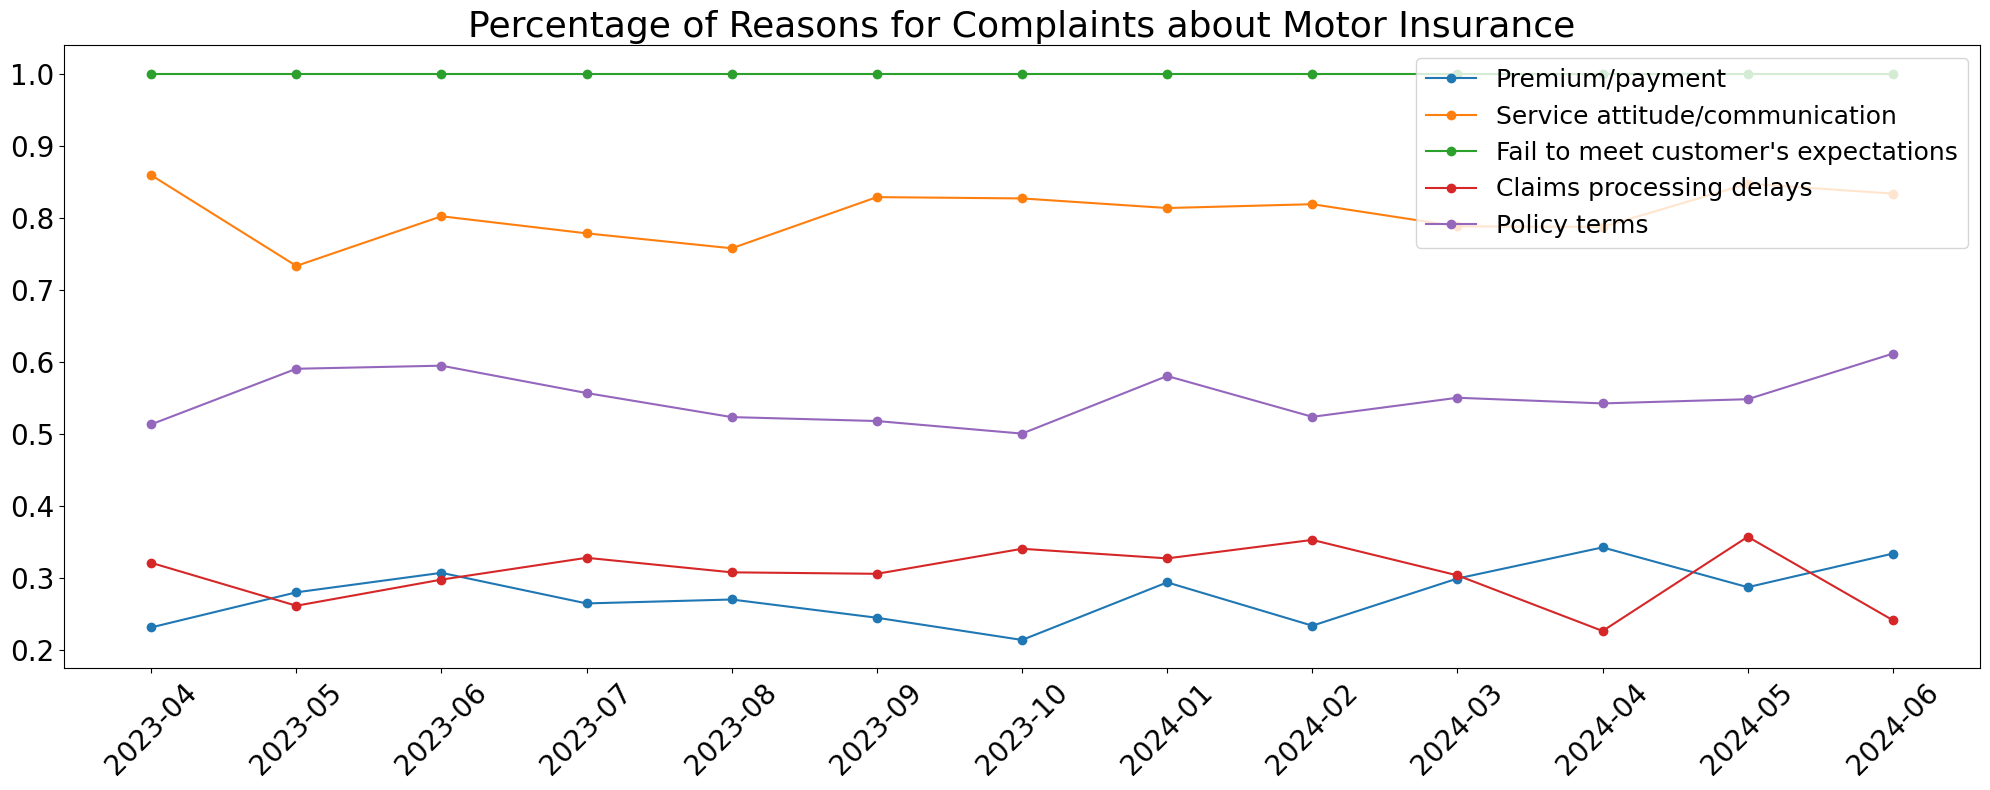

In [5]:
motor_date_grouped_df.reset_index(inplace=True)
plt.figure(figsize=(20, 8))
issues = [
    'premium/payment', 
    'service attitude/communication', 
    "fail to meet customer's expectations", 
    'claims processing delays', 
    'policy terms'
]
for issue in issues:
    plt.plot(motor_date_grouped_df['date'].astype(str), motor_date_grouped_df[issue], marker='o', label=issue.replace('_', ' ').capitalize())
plt.title('Percentage of Reasons for Complaints about Motor Insurance', fontsize=26)
plt.xlabel('')
plt.ylabel('')
plt.legend(fontsize=18, loc='upper right')
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()

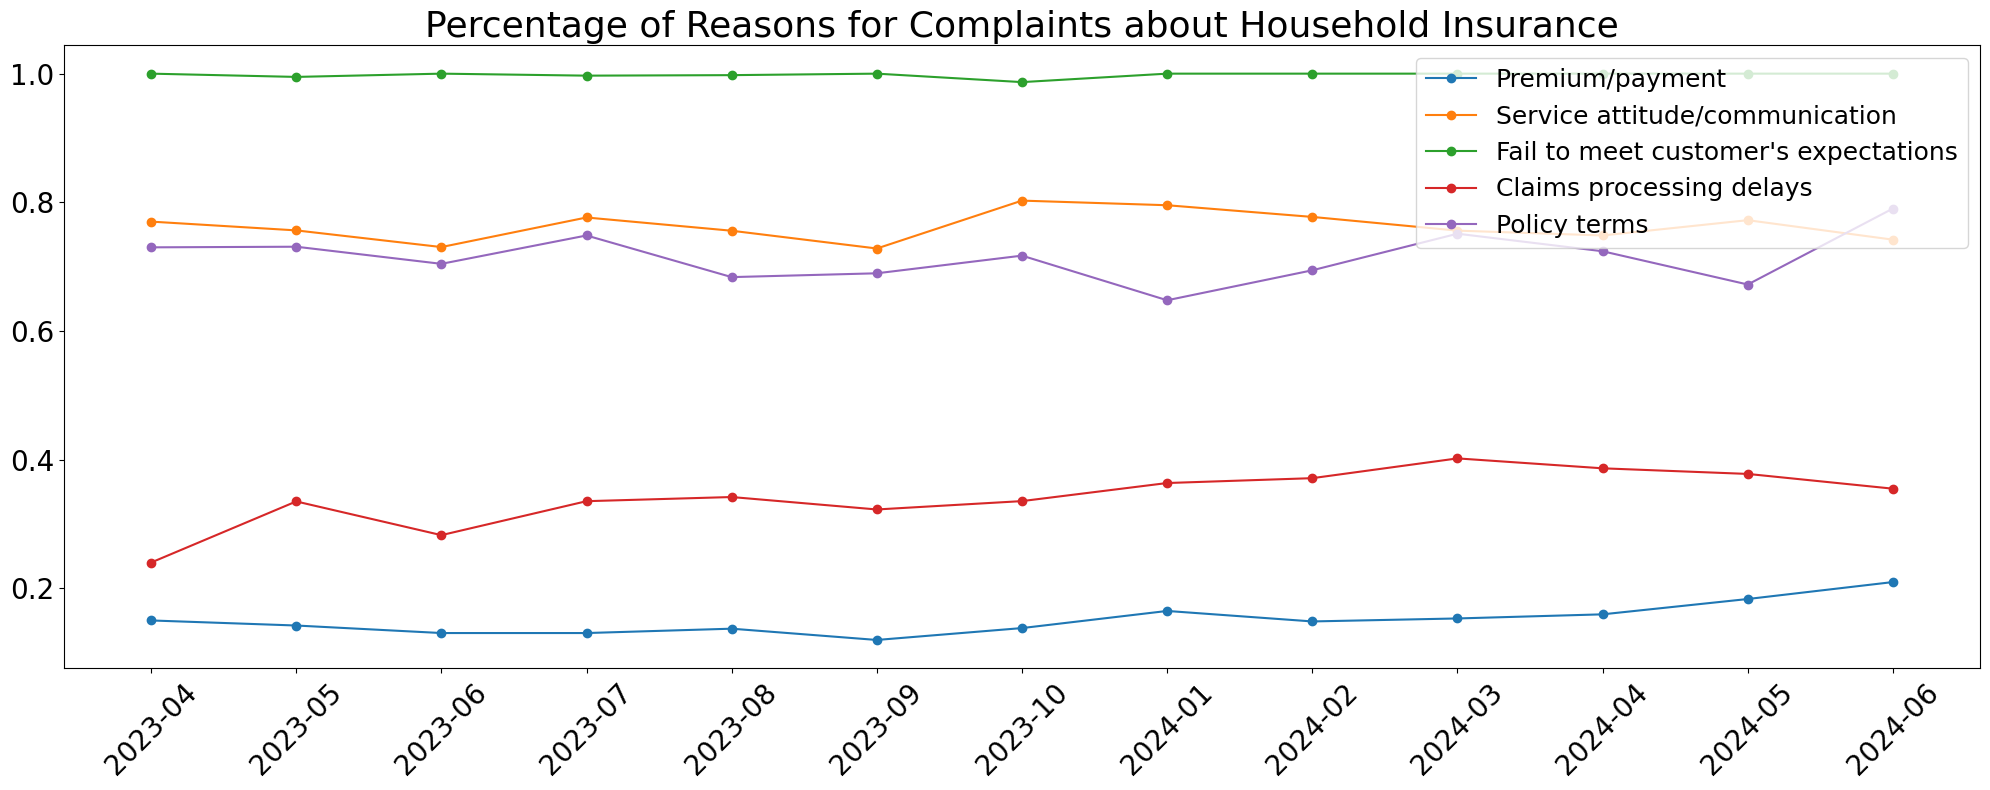

In [6]:
household_date_grouped_df.reset_index(inplace=True)
plt.figure(figsize=(20, 8))
for issue in issues:
    plt.plot(household_date_grouped_df['date'].astype(str), household_date_grouped_df[issue], marker='o', label=issue.replace('_', ' ').capitalize())
plt.title('Percentage of Reasons for Complaints about Household Insurance', fontsize=26)
plt.xlabel('')
plt.ylabel('')
plt.legend(fontsize=18, loc='upper right')
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()

C:\Users\GUOKECHENG\AppData\Local\Temp\ipykernel_27592\1987243440.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.bar(x + i * width, [female_data[i], male_data[i],male_female_data[i]], width, label=issue)


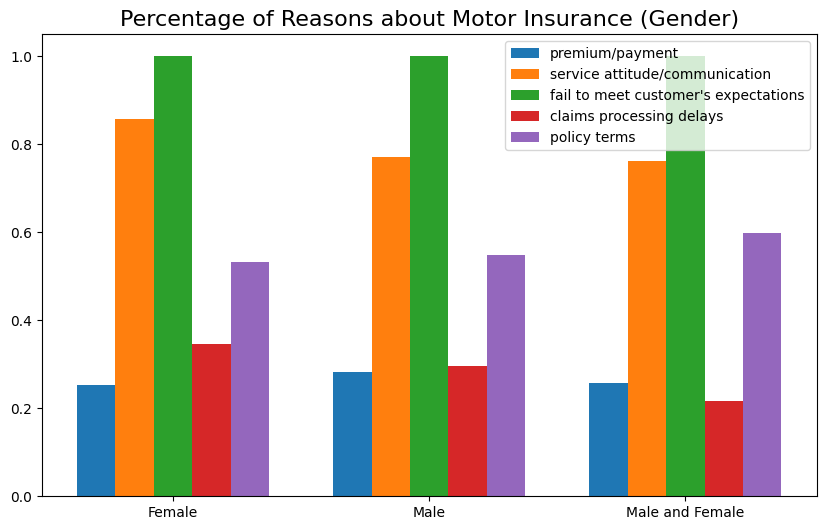

In [7]:
male_data = motor_gender_grouped_df.loc['Male', issues]
female_data = motor_gender_grouped_df.loc['Female', issues]
male_female_data = motor_gender_grouped_df.loc['Male and Female', issues]
x = np.arange(3) 

width = 0.15  
fig, ax = plt.subplots(figsize=(10, 6))
for i, issue in enumerate(issues):
    ax.bar(x + i * width, [female_data[i], male_data[i],male_female_data[i]], width, label=issue)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Percentage of Reasons about Motor Insurance (Gender)', fontsize=16)
ax.set_xticks(x + width * 2)
ax.set_xticklabels(['Female', 'Male', 'Male and Female'])
ax.legend()
plt.show()

C:\Users\GUOKECHENG\AppData\Local\Temp\ipykernel_27592\255934227.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.bar(x + i * width, [female_data[i], male_data[i],male_female_data[i]], width, label=issue)


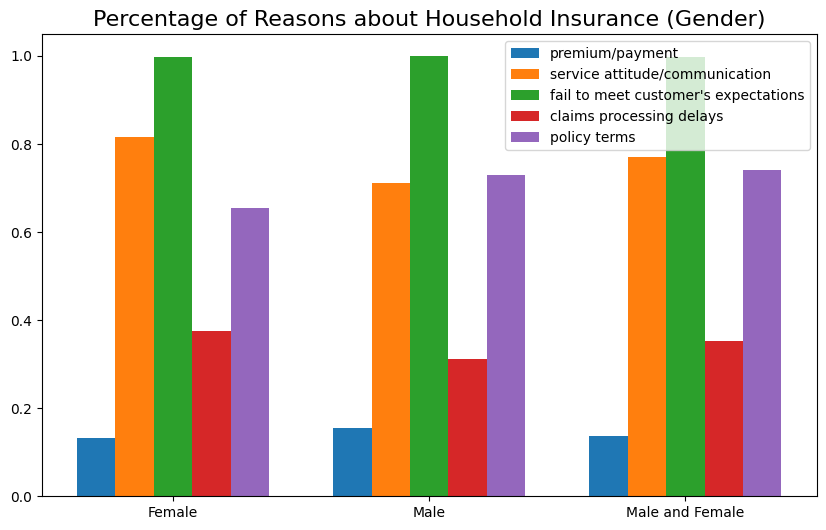

In [8]:
male_data = household_gender_grouped_df.loc['Male', issues]
female_data = household_gender_grouped_df.loc['Female', issues]
male_female_data = household_gender_grouped_df.loc['Male and Female', issues]
x = np.arange(3) 

width = 0.15  
fig, ax = plt.subplots(figsize=(10, 6))
for i, issue in enumerate(issues):
    ax.bar(x + i * width, [female_data[i], male_data[i],male_female_data[i]], width, label=issue)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Percentage of Reasons about Household Insurance (Gender)', fontsize=16)
ax.set_xticks(x + width * 2)
ax.set_xticklabels(['Female', 'Male', 'Male and Female'])
ax.legend()
plt.show()

### Travel Insurance (not offered by SB company)

In [9]:
travel_df = df[df['type of insurance']=='Travel']
travel_date_grouped_df = travel_df.groupby('date').mean(numeric_only=True)
travel_gender_grouped_df = travel_df.groupby('gender').mean(numeric_only=True)
# I will save the grouped dataframes to xlsx files, and then draw the plots in Excel
# travel_date_grouped_df.to_csv('travel_date_grouped_df.xlsx)
# travel_gender_grouped_df.to_csv('travel_gender_grouped_df.xlsx)

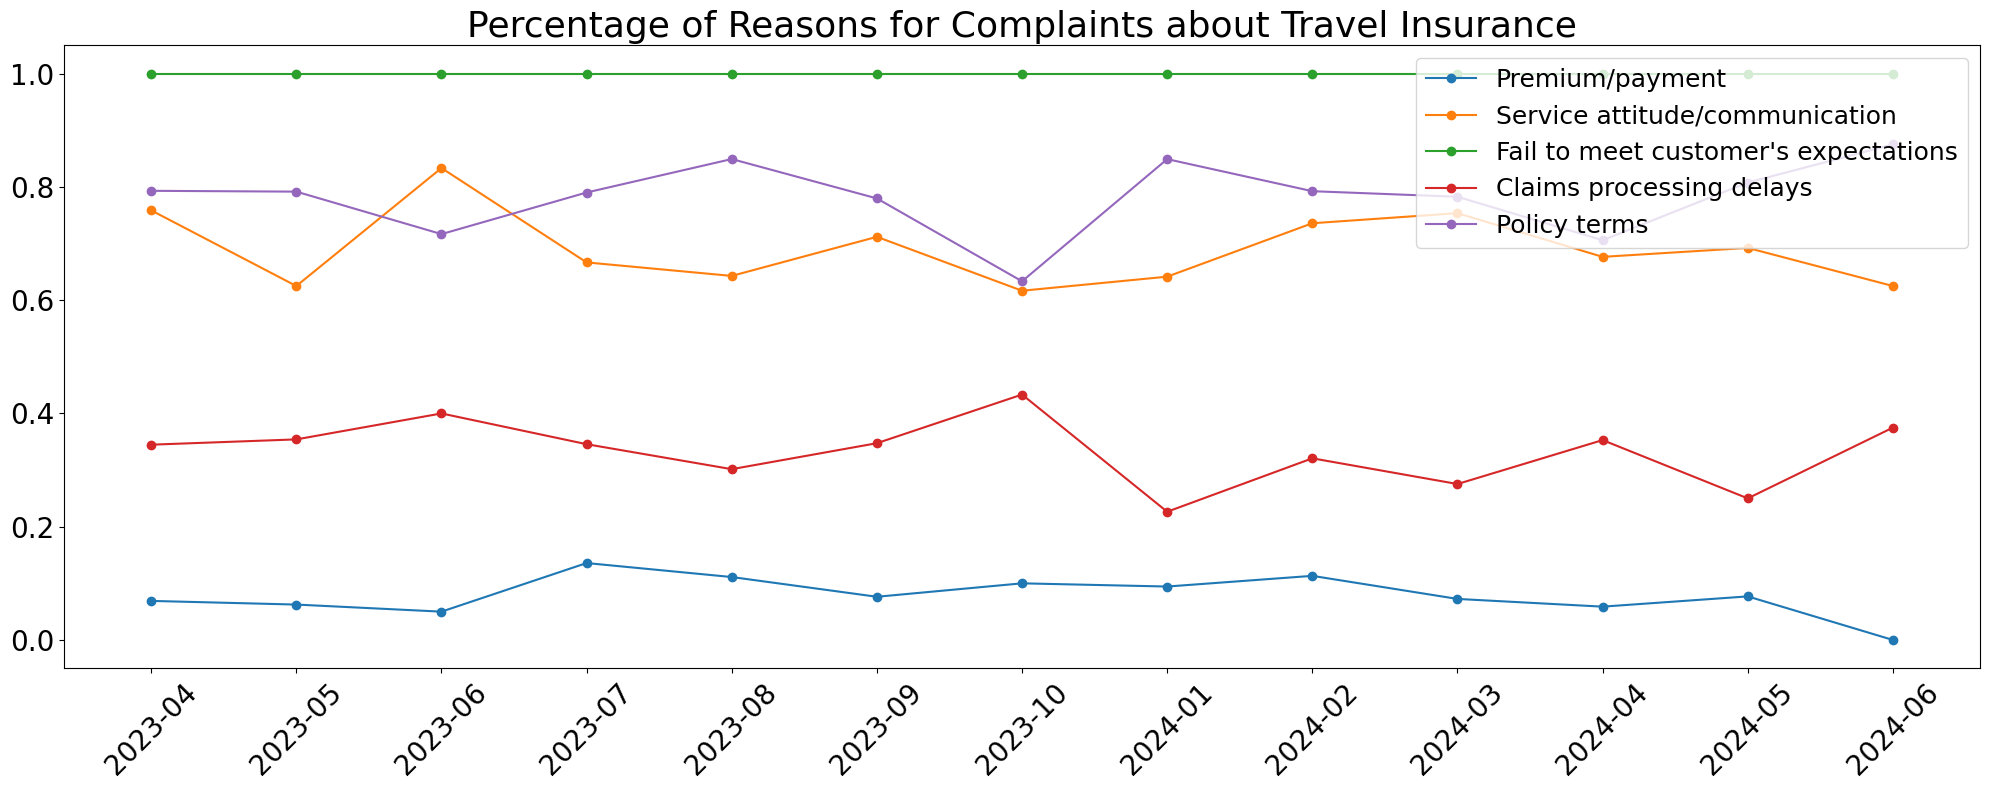

In [10]:
travel_date_grouped_df.reset_index(inplace=True)
plt.figure(figsize=(20, 8))
for issue in issues:
    plt.plot(travel_date_grouped_df['date'].astype(str), travel_date_grouped_df[issue], marker='o', label=issue.replace('_', ' ').capitalize())
plt.title('Percentage of Reasons for Complaints about Travel Insurance', fontsize=26)
plt.xlabel('')
plt.ylabel('')
plt.legend(fontsize=18, loc='upper right')
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()


C:\Users\GUOKECHENG\AppData\Local\Temp\ipykernel_27592\653436679.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.bar(x + i * width, [female_data[i], male_data[i],male_female_data[i]], width, label=issue)


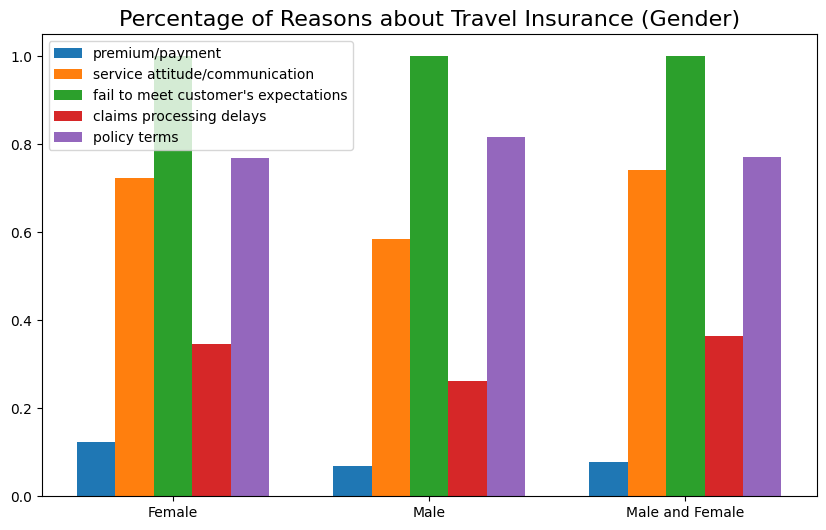

In [11]:
male_data = travel_gender_grouped_df.loc['Male', issues]
female_data = travel_gender_grouped_df.loc['Female', issues]
male_female_data = travel_gender_grouped_df.loc['Male and Female', issues]
width = 0.15  
fig, ax = plt.subplots(figsize=(10, 6))
for i, issue in enumerate(issues):
    ax.bar(x + i * width, [female_data[i], male_data[i],male_female_data[i]], width, label=issue)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Percentage of Reasons about Travel Insurance (Gender)', fontsize=16)
ax.set_xticks(x + width * 2)
ax.set_xticklabels(['Female', 'Male', 'Male and Female'])
ax.legend()
plt.show()

## 3.Analysis of Upheld Cases for Insurance Products

In [12]:
df['decision'] = df['decision'].replace({1:'Upheld',0:'Not upheld'})

d:\Sta-Software\python\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Sta-Software\python\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


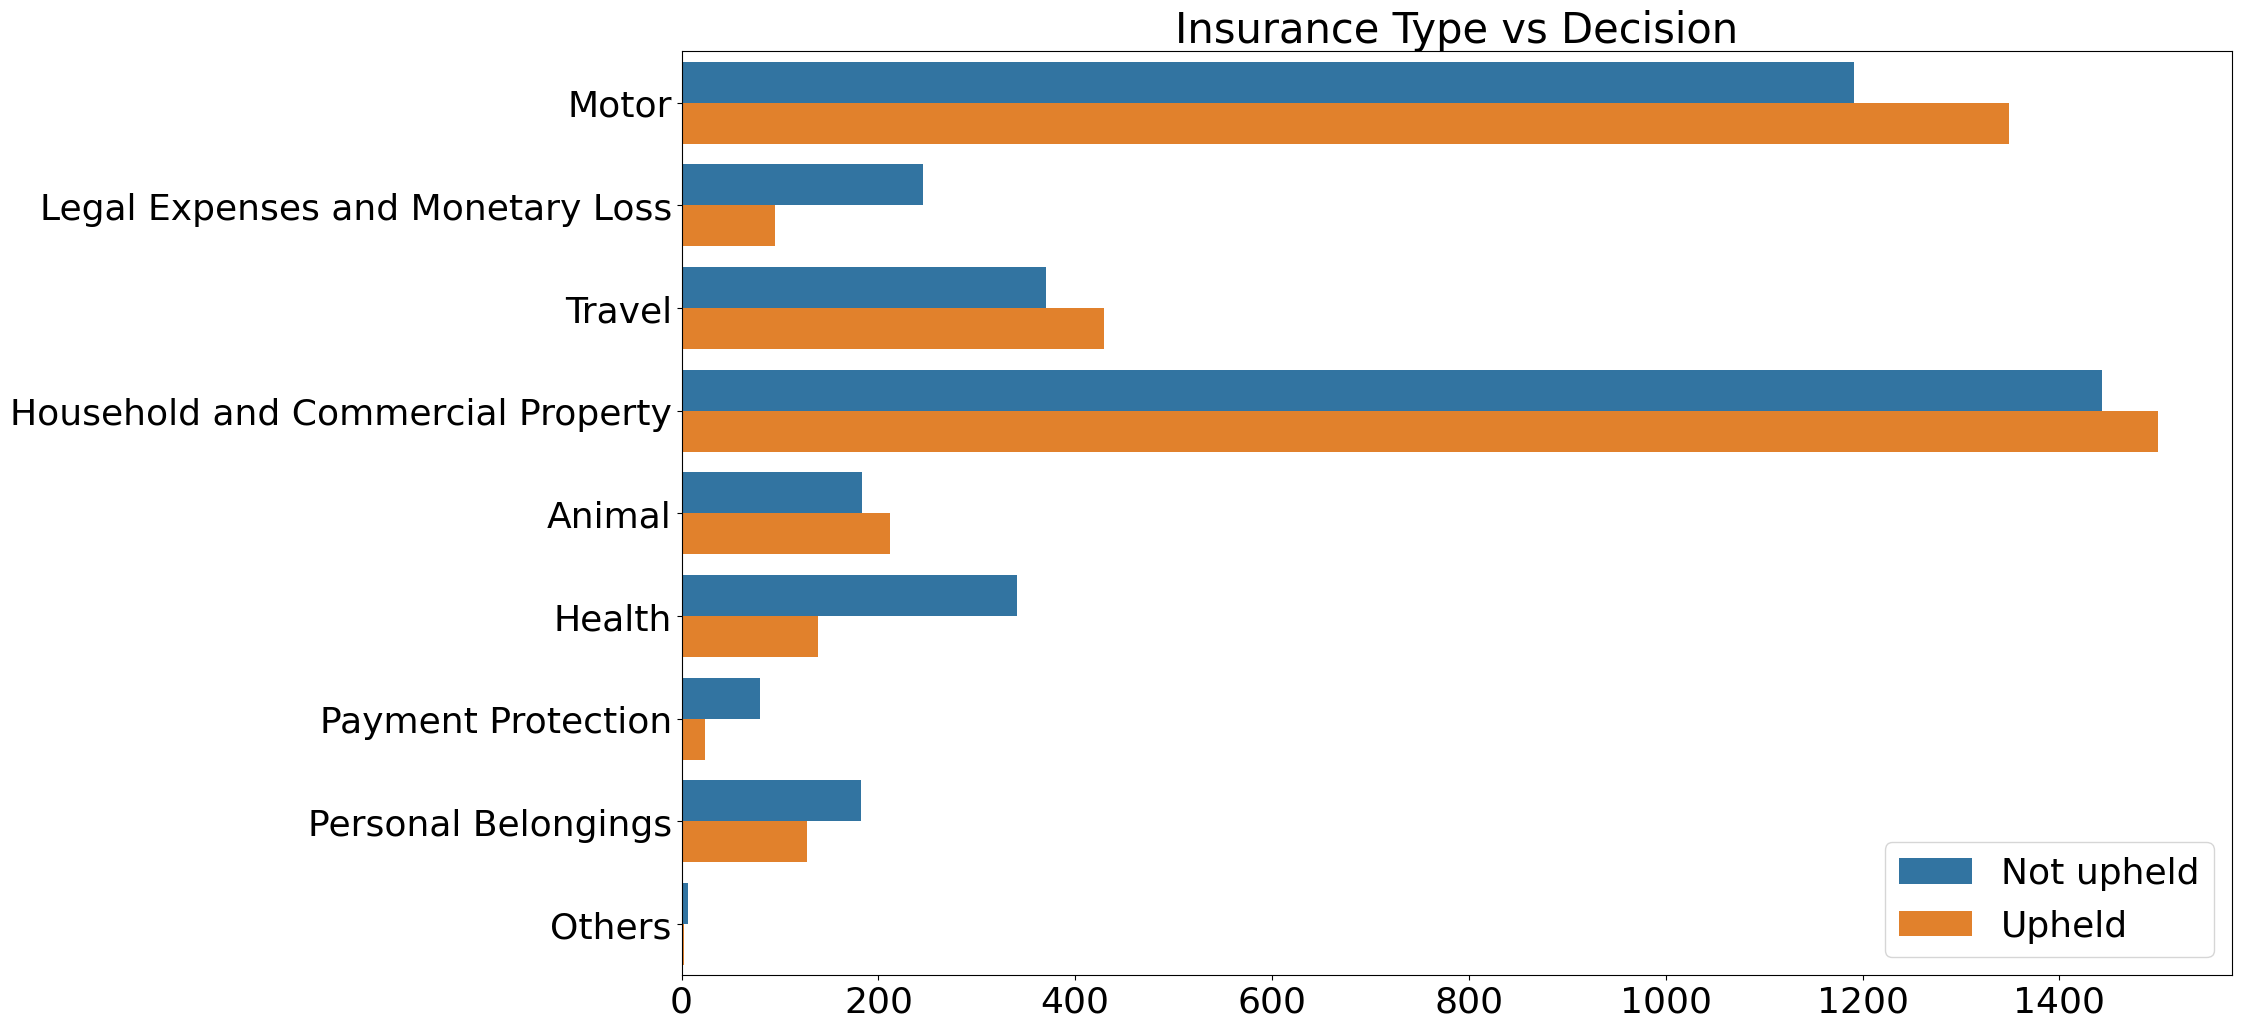

In [13]:
plt.figure(figsize=(20, 12))
sns.countplot(data=df, y='type of insurance', hue='decision')
plt.title('Insurance Type vs Decision', fontsize=30)
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize=26)
plt.xticks(fontsize=26)
plt.legend(loc='lower right', fontsize=26)
plt.grid(False)
plt.show()

d:\Sta-Software\python\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Sta-Software\python\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


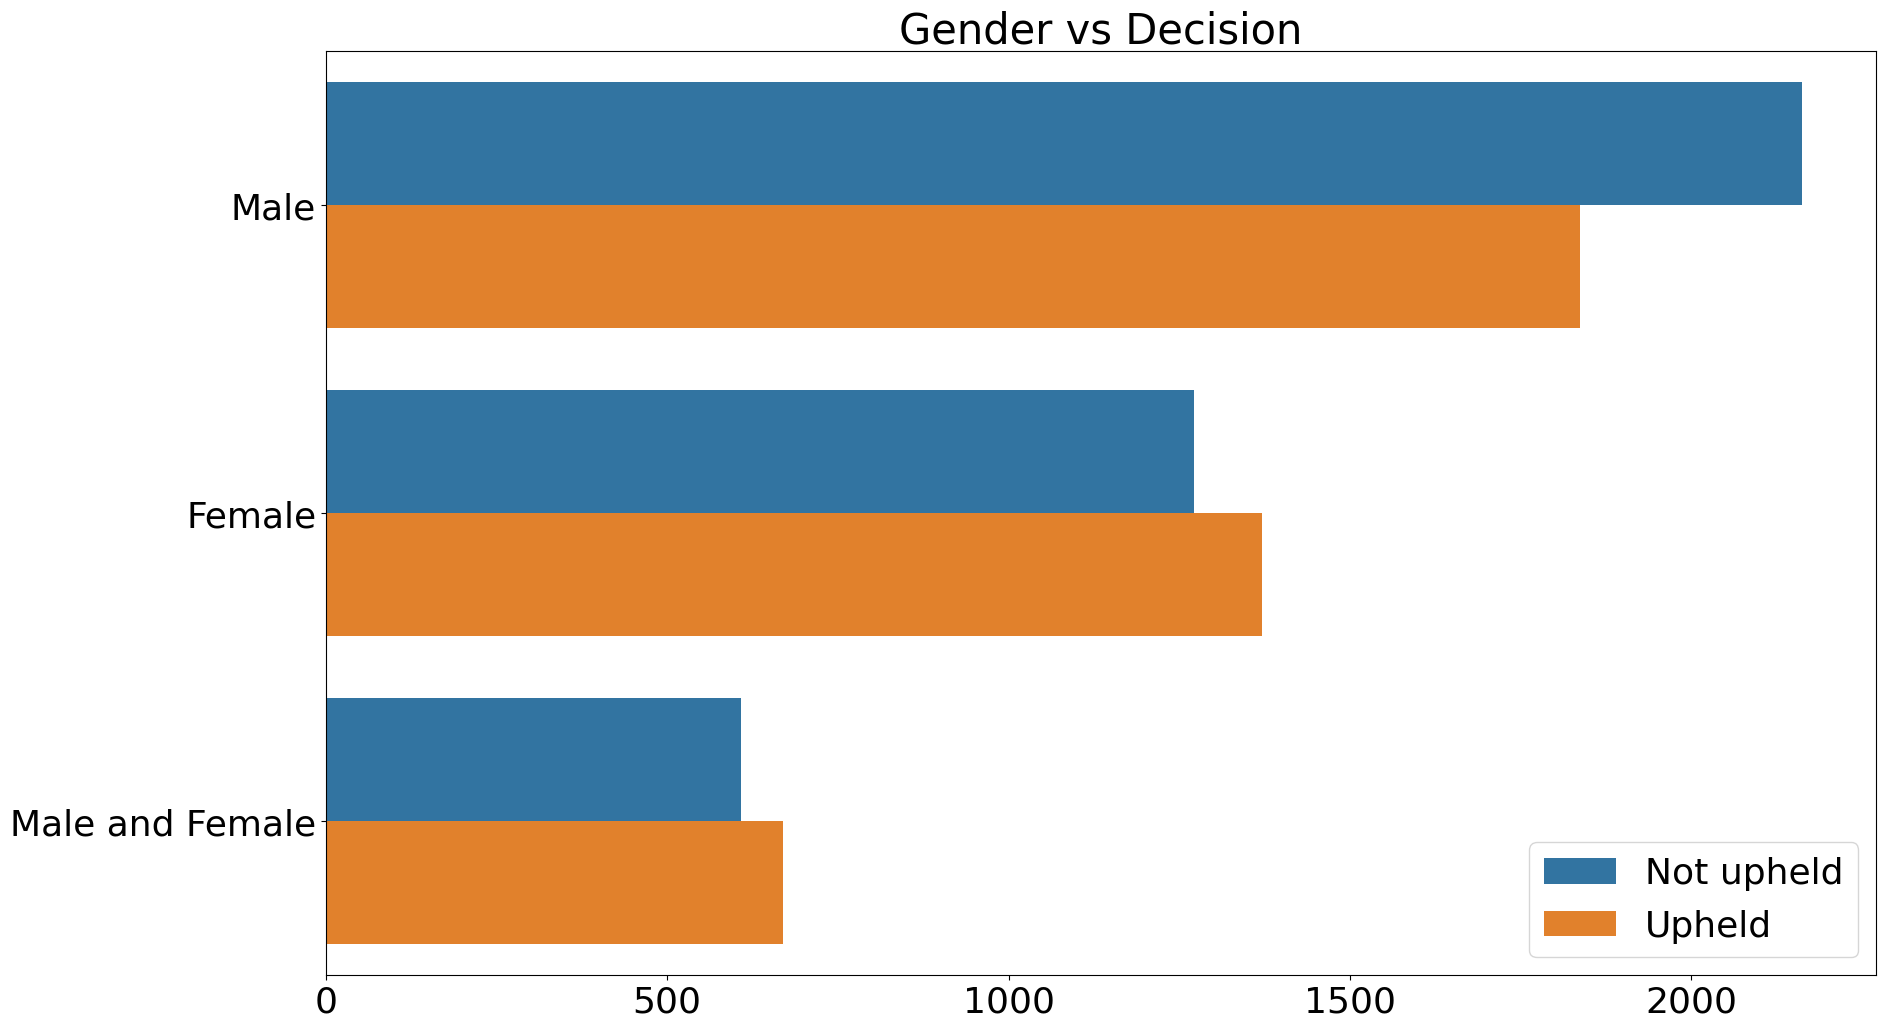

In [14]:
plt.figure(figsize=(20, 12))
sns.countplot(data=df, y='gender', hue='decision')
plt.title('Gender vs Decision', fontsize=30)
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize=26)
plt.xticks(fontsize=26)
plt.legend(fontsize=26)
plt.grid(False)
plt.show()

d:\Sta-Software\python\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
d:\Sta-Software\python\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


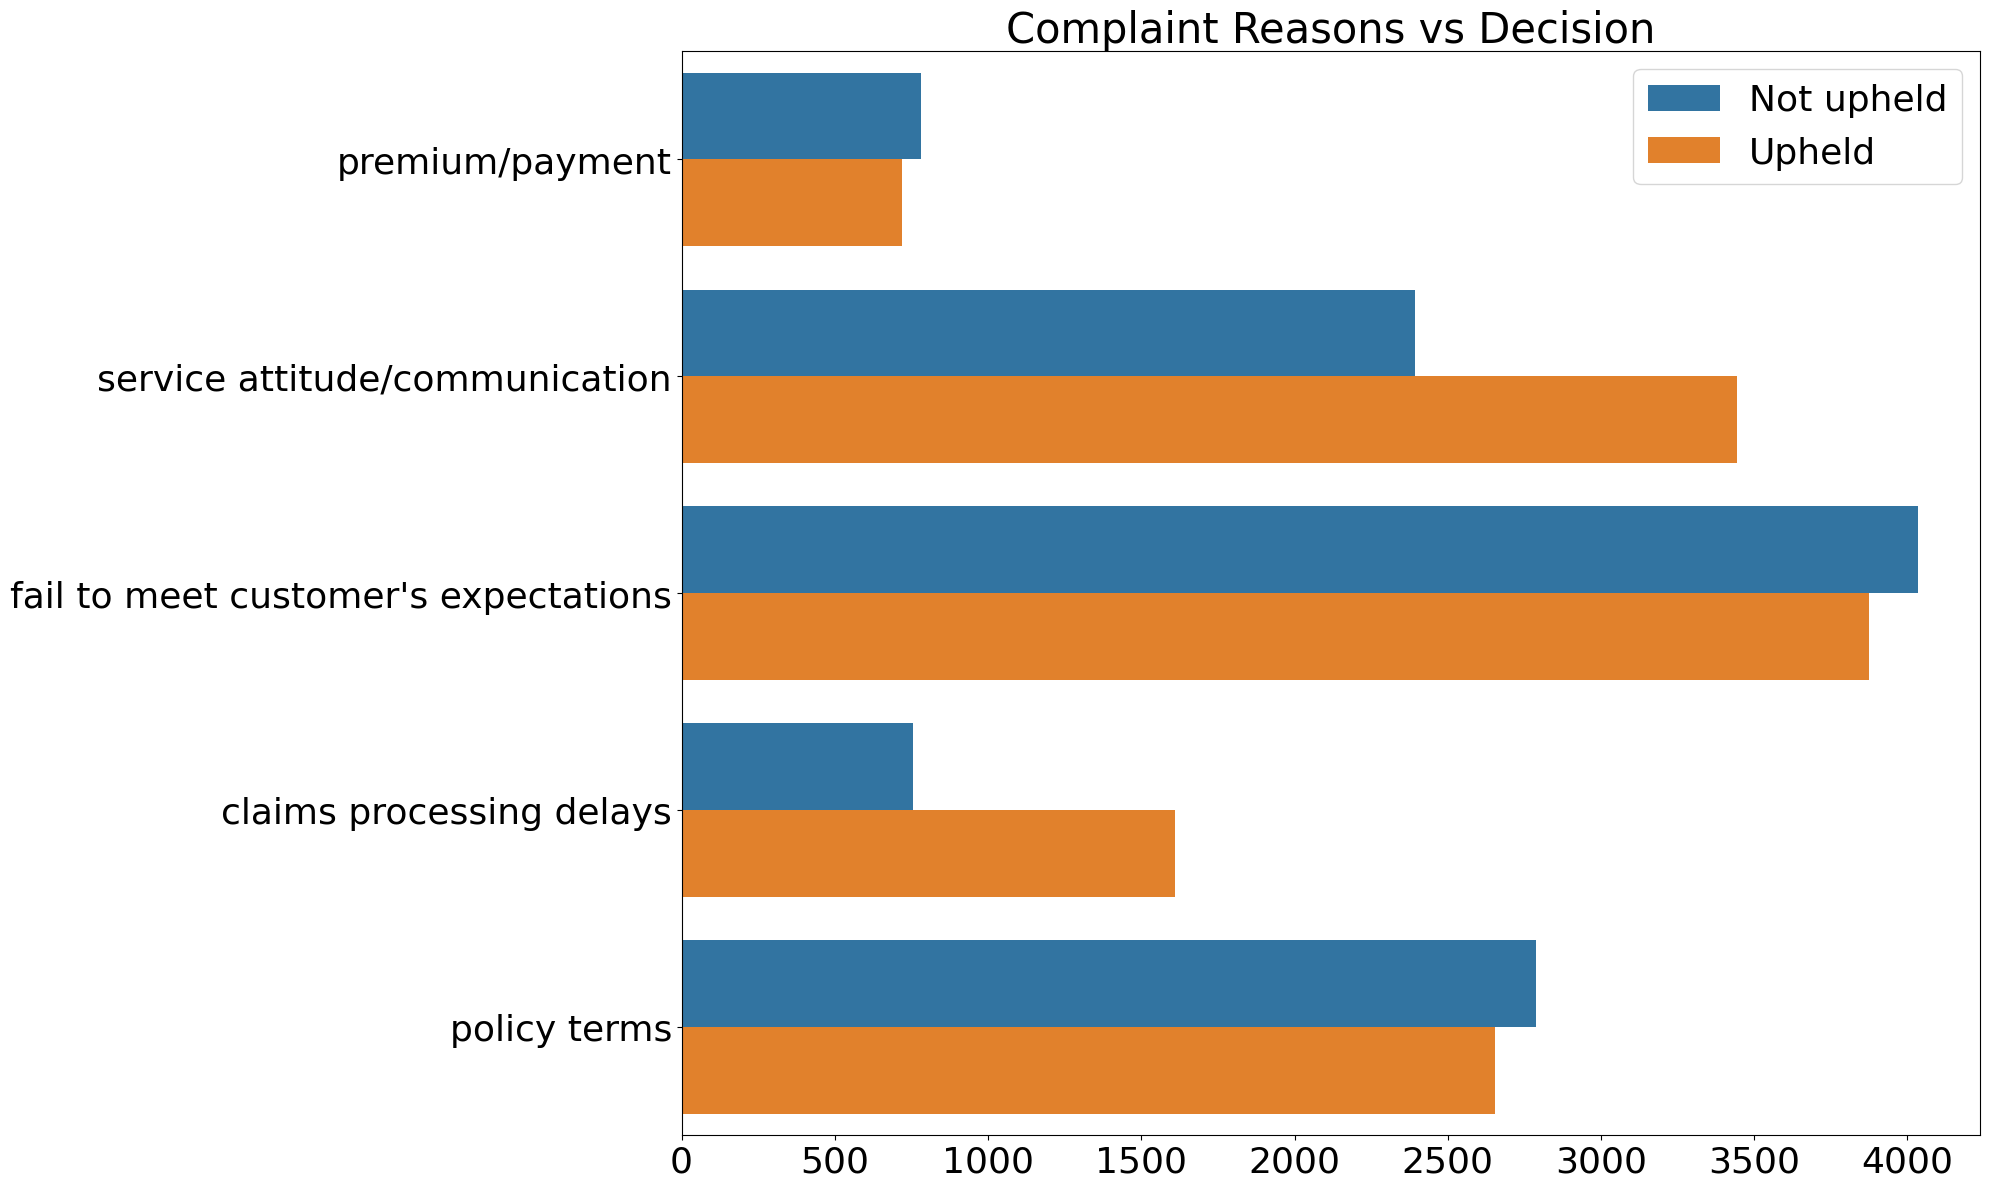

In [15]:
complaint_reasons = [
    'premium/payment', 
    'service attitude/communication', 
    "fail to meet customer's expectations", 
    'claims processing delays', 
    'policy terms'
]

plot_data = pd.DataFrame()
for reason in complaint_reasons:
    filtered_df = df[df[reason] == 1]
    filtered_counts = filtered_df['decision'].value_counts().reset_index()
    filtered_counts.columns = ['decision', 'count']
    filtered_counts['reason'] = reason
    plot_data = pd.concat([plot_data, filtered_counts])

plt.figure(figsize=(20, 12))
sns.barplot(y='reason', x='count', hue='decision', data=plot_data)
plt.title('Complaint Reasons vs Decision', fontsize=30)
plt.ylabel('')
plt.xlabel('',fontsize=18)
plt.legend(fontsize=26)
plt.yticks(fontsize=26)
plt.xticks(fontsize=26)
plt.grid(False)
plt.tight_layout()
plt.show()


C:\Users\GUOKECHENG\AppData\Local\Temp\ipykernel_27592\1510174317.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['decision'] = df['decision'].replace({'Upheld':1,'Not upheld':0})


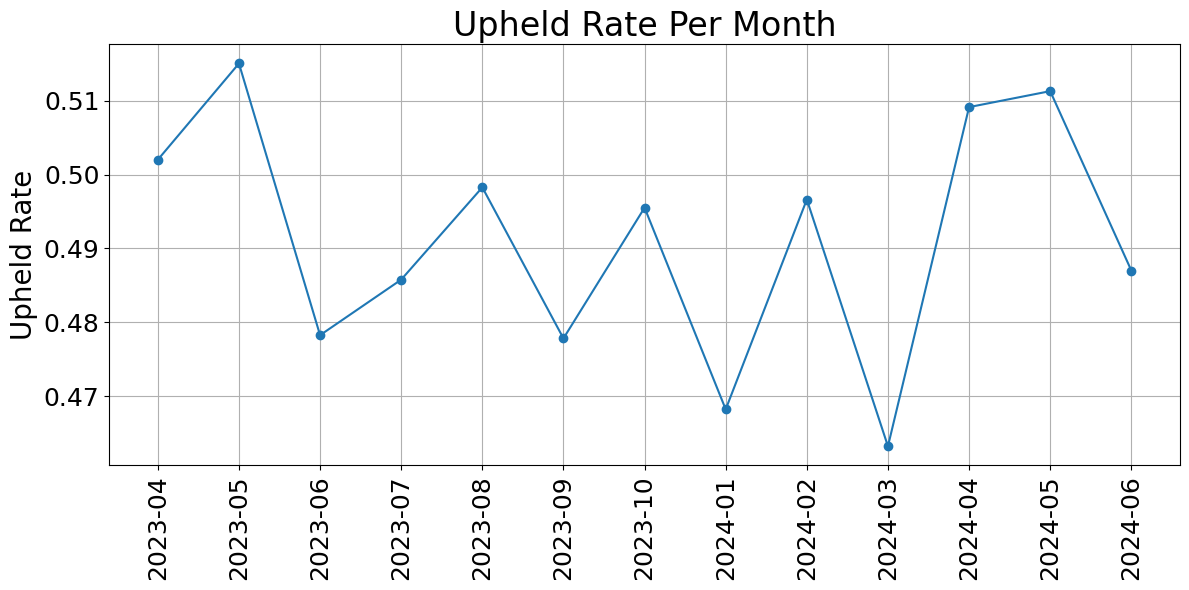

In [16]:
df['decision'] = df['decision'].replace({'Upheld':1,'Not upheld':0})
upheld_rate_by_month = df.groupby('date')['decision'].mean().reset_index()
upheld_rate_by_month['date'] = upheld_rate_by_month['date'].astype(str)
upheld_rate_by_month.columns = ['date', 'Upheld Rate']

plt.figure(figsize=(12, 6))
plt.plot(upheld_rate_by_month['date'], upheld_rate_by_month['Upheld Rate'], marker='o')
plt.xticks(rotation=90)
plt.title('Upheld Rate Per Month', fontsize=24)
plt.xlabel('')
plt.ylabel('Upheld Rate', fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.show()
